In [1]:

import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_abline,
    labs, theme, element_line, scale_color_manual,
    coord_cartesian, xlim, ylim
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv('dataset\\music_genre.csv')

df.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
# Modificar filtrado; Igualar Hip-Hop a Rap, eliminar Anime
print("Estadísticas:")
print(df[['acousticness','loudness','music_genre']].describe())

print("\nNulos por columna:")
print(df[['acousticness','loudness','music_genre']].isnull().sum())

# Guardar versión filtrada (si quieres seguir usando en otros scripts)
df[['acousticness','loudness','music_genre']].to_csv('dataset\\fdata.csv', index=False)


Estadísticas:
       acousticness      loudness
count  50000.000000  50000.000000
mean       0.306383     -9.133761
std        0.341340      6.162990
min        0.000000    -47.046000
25%        0.020000    -10.860000
50%        0.144000     -7.276500
75%        0.552000     -5.173000
max        0.996000      3.744000

Nulos por columna:
acousticness    5
loudness        5
music_genre     5
dtype: int64


c:\Users\nesto\dev\stvault\Trabajo-IA-1\.venv312\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


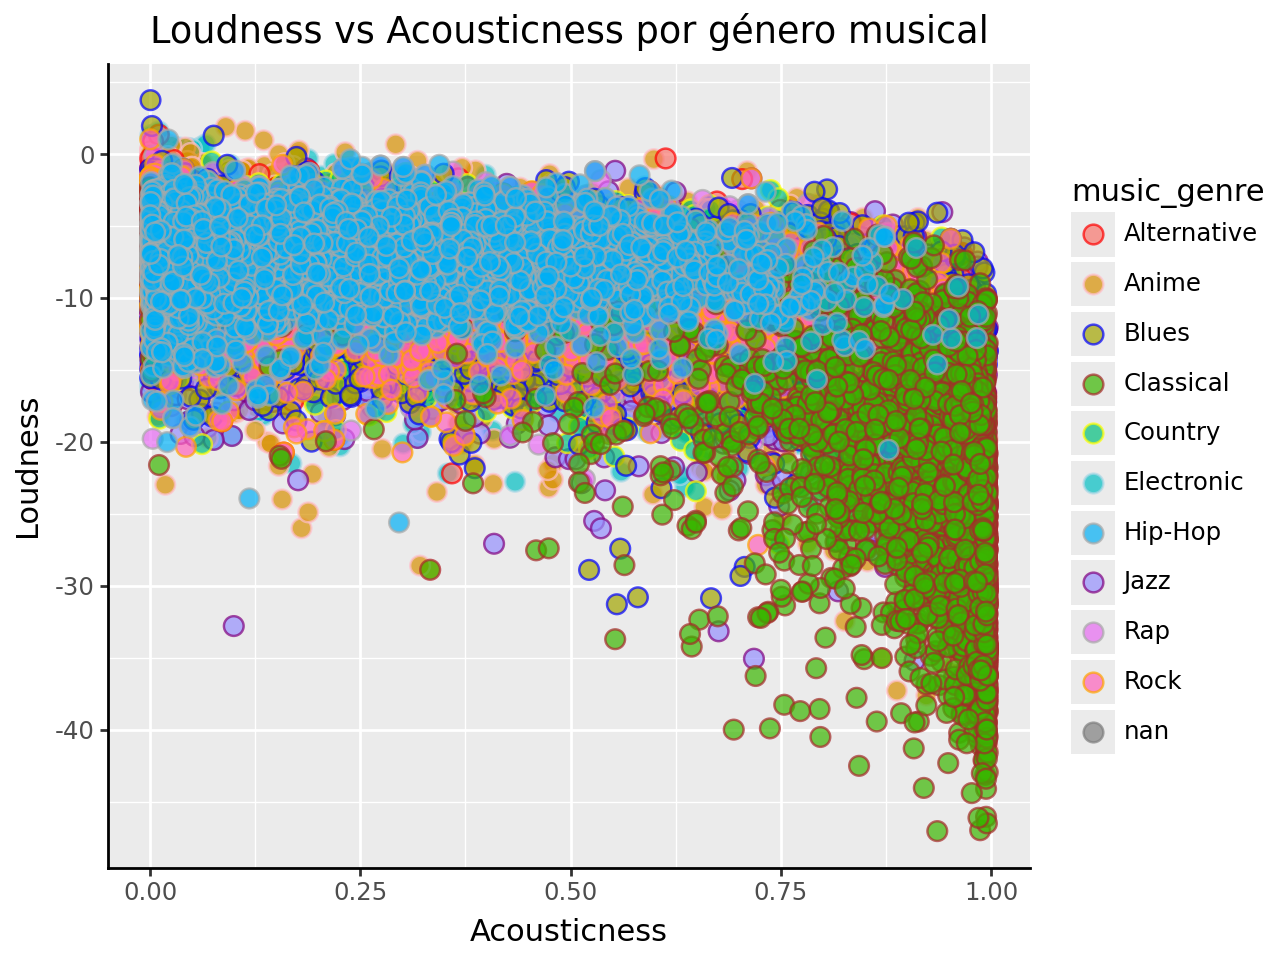

In [ ]:

df_filtrado = pd.read_csv('dataset\\fdata.csv')

plot = (
    ggplot(df_filtrado, aes(x='acousticness', y='loudness', color='music_genre', fill='music_genre'))
    + geom_point(shape='o', size=3, stroke=0.5)
    + scale_color_manual(values={
        'Alternative': 'red',
        'Anime': 'pink',
        'Blues': 'blue',
        'Classical': 'brown',
        'Country': 'yellow',
        'Hip-Hop': 'darkgrey',
        'Rap': 'darkgrey',
        'Electronic': 'lightblue',
        'Rock': 'orange',
        'Jazz': 'purple'
    })
    + labs(title='Loudness vs Acousticness por género musical',
           x='Acousticness',
           y='Loudness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)
plot


c:\Users\nesto\dev\stvault\Trabajo-IA-1\.venv312\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


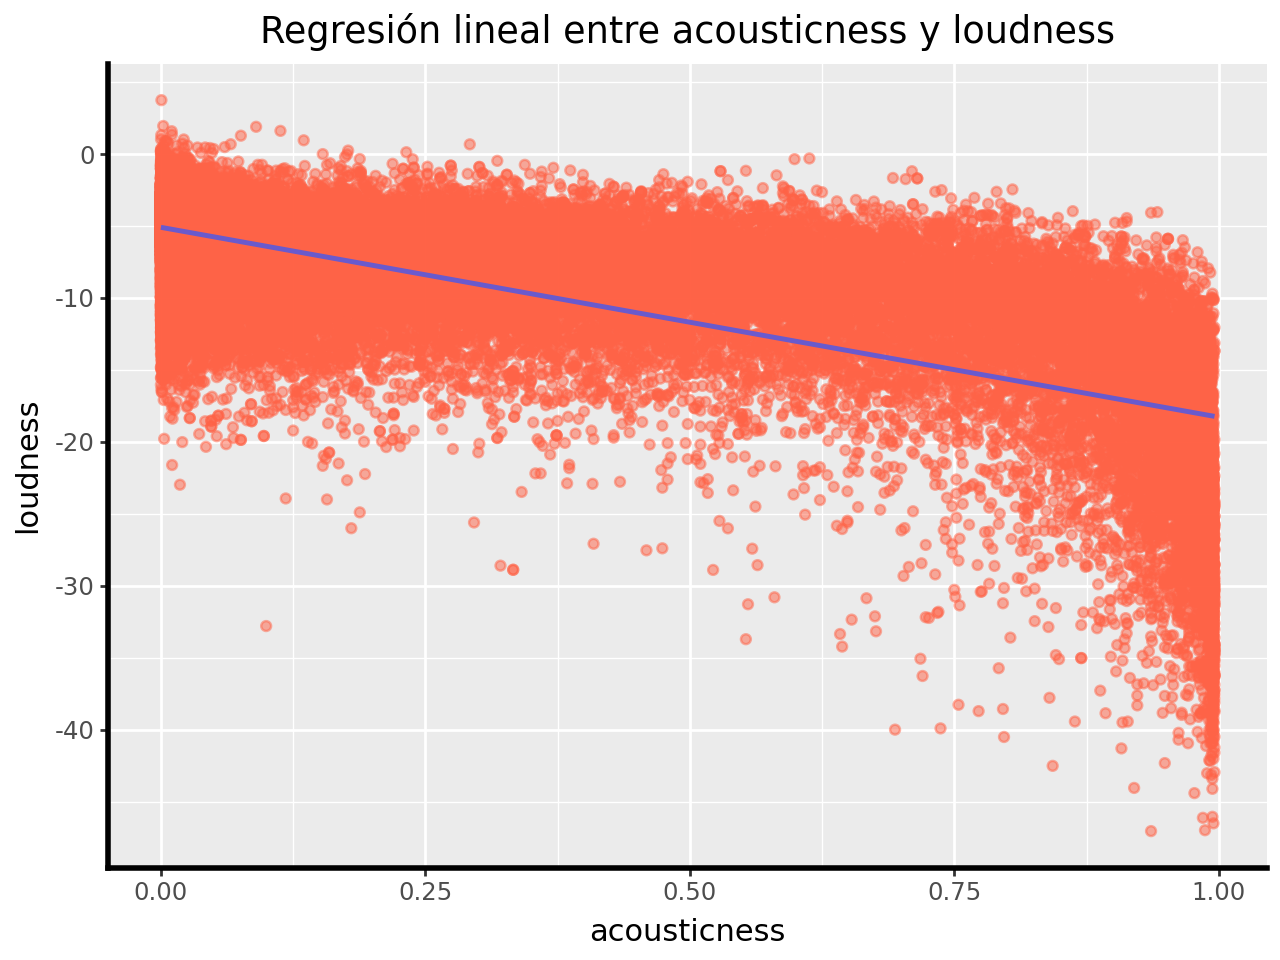

In [36]:
import pandas as pd
from plotnine import element_line, geom_smooth, ggplot, aes, geom_point, labs, theme

df = pd.read_csv('dataset\\fdata.csv')

plot = (
    ggplot(df, aes(x='acousticness', y='loudness')) +
    geom_point(color='tomato', alpha=0.5) +
    geom_smooth(method='lm', color='slateblue', se=False) +
    labs(title='Regresión lineal entre acousticness y loudness',
        x='acousticness', y='loudness') +
    theme(
        axis_line_x=element_line(color='black', size=2),
        axis_line_y=element_line(color='black', size=2)
    )
)
plot


In [37]:

X = df_filtrado[['acousticness','loudness']]
y = df_filtrado['music_genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

KeyboardInterrupt: 